# I Neural network representation

It a pretty old idea and today it is the state of the art technique for many different machine learning problems. We already have linear and logistic regression so naturally you can think why do wee need neural netoworks. To get a sense for that we have to look into a complex non linear hypothesis. 


## Non linear hypothesis

In previous lectures, we went thought  linear hypotheses such as <code>**linear regression, multivariate linear regression and logistic regression**</code>. They are useful for al lot of problems, but still not enough to cover all problems in reality. The non-linear classification problems is one of those that can not be solved easily by just using linear methods.

<code>**Linear logistic regression**</code>
\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} +  + \theta_{n}x_{n})
\end{multline*}


If we have a training set like this and we want to apply logistic regression on thing we could do is apply logistic regression with a lot of <code>**non linear features (polynomials)**</code> <br>

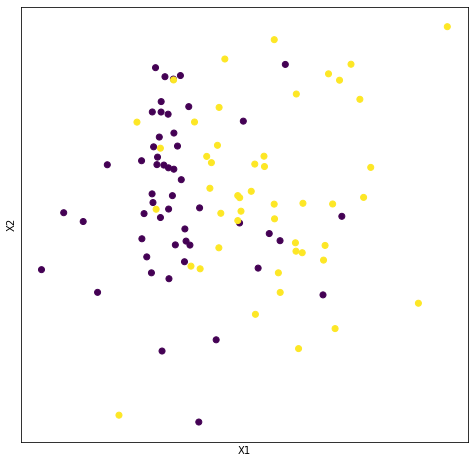

<code>**Non linear logistic regression**</code>
\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2} + \theta_{4}x_{1}^2x_{2} + \theta_{5}x_{1}^{3}x_{2} + \theta_{6}x_{1}x_{2}^{2} + \ ...)
\end{multline*}

In [ ]:
# from sklearn.datasets import make_classification
# import matplotlib.pyplot as plt

# X, y = make_classification(
#         n_samples=100, 
#         n_classes=2,
#         n_features=2, 
#         n_informative=2, 
#         n_redundant=0,
#         random_state=0,
#         n_clusters_per_class=2,
#         flip_y=0.25
# )
# plt.figure(figsize=(8,8))
# plt.scatter(X[:, 0], X[:, 1], c=y);
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.xticks([])
# plt.yticks([])
# plt.show();

If we will include lots of polynomials terms like those above and if its enough maybe we can get a hypothesis that separates those examples from different classes. And this method works well when we have say <code>**two features x1, x2**</code> then we can include all those polynomial terms of x1, x2. But for many most machine learning problems there will be a lot more features than two.<br>

The non-linear form is more complex since it is with lots of polynomial terms. However, when a number of feature is large, the above solution is not a good choice to learn complex non-linear hypothesis. Image if we have say <code>**100 features**</code> and if we were  to include all the quadratic terms, only those that are second order polynomials terms there would be a lot of them.

\begin{multline*}
x_{1}^{2}, x_{1}x_{2}, x_{1}x_{3}, x_{1}x_{4} , \ ... \ , x_{1}x_{100}  
\end{multline*}

\begin{multline*}
x_{2}^{2}, x_{2}x_{3}, x_{2}x_{4}, x_{2}x_{5} , \ ... \ , x_{2}x_{100}  
\end{multline*}

And if we include just the second order terms, that is the terms that are a product of two terms. Then for the case when <code>**n = 100**</code> we end up with about ≈ 5000 features. The number of quadratic features grows roughly as order <code>**O(n²)**</code> in this particular case it closer to <code>**≈ n² / 2**</code>.<br>

Include all of the quadratic features doesn't seem a good way forward, that a lot of features and we might end up overfitting the training set and more important it can be <code>**computationally expensive**</code> to work with that many features.<br>

One we could do is to inlcude only the subset of these maybe with the original ones:
\begin{multline*}
x_{1}^{2}, x_{2}^{2}, x_{3}^{2} \ ... \ , x_{100}^{2}  
\end{multline*}

Then the number of features is going to be much smaller. But this is not enough features and certainly <code>**won't let us fit complex data set like above**</code>. But in fact we know that if we include only these quadratic features together with orginal features then we can fit hypothesis that are elipses

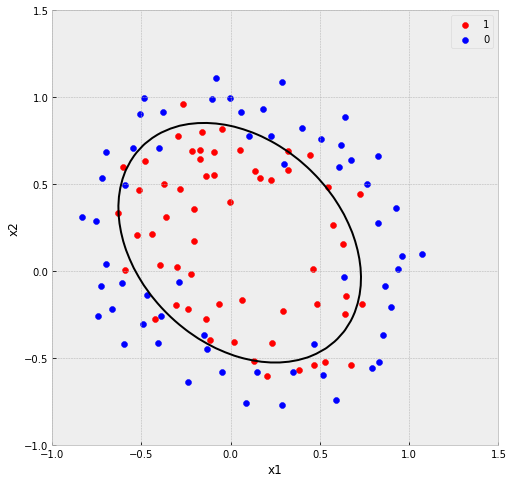

5000 features seems like a lot if we were include the cubic (third order polynomials) of each feature.
\begin{multline*}
x_{1}x_{2}x_{3}, x_{1}^{2}x_{2}, x_{10}x_{11}x_{13} \ ...   
\end{multline*}

There are gonna be a lot of these features, they grow roughly as order <code>**O(n³)**</code>, so if n = 100 we can compute that we end up with <code>**≈ 200 000**</code> such cubic features. Include these higher order polynomials features when our original feature set is large this gets really dramatically imploded in feature space. <code>**This is not a good way to come up with addtional features with which we are building non linear classifiers when n is large**</code>

For many machine learning problems n will be pretty large. Like computer vision :) problems

Suppose we want to use machine learning to train a classifier to examine an image and tell us wheter or not the image is of a human. Many people wonder why computer vision could be difficult. I mean when we all look at this picture it is so obvious what it is. So how a learning algorithm could possibly fail to know that this picture is.

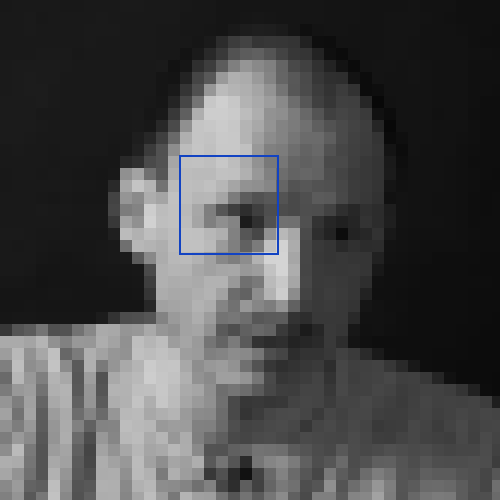

Well to understand that we need to zoom in into a small part of the image, like the area where blue rectangle is. where you and i see a human face the computer sees a matrix or a grid of pixel intesity values that tells us the brightness of each pixel in the image. And the problem is to look at this matrix of pixel intesity values and tell and tell that these numbers represent the human eye.

In [1]:
import cv2 as cv
file = '../images/non_linear_data_sample_region.jpg'
img = cv.imread(file)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape)
print(img)

(95, 95)
[[192 192 192 ... 121 121 121]
 [192 192 192 ... 121 121 121]
 [192 192 192 ... 121 121 121]
 ...
 [193 193 193 ... 193 193 193]
 [193 193 193 ... 193 193 193]
 [193 193 193 ... 193 193 193]]


When we use machine learning to build a classifier (human face detector) what we do is come up with a label training set with few label examples of human face and a few examples of things that are not human faces. Then we give our training set to the learning algorithm and train a classifier and the test. And hopefully it will recognize correctly what test sample is.

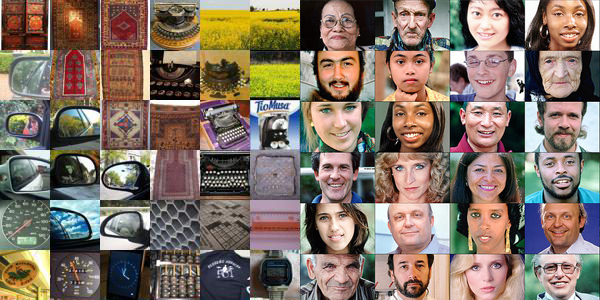

To understand why we need <code>**non linear hypothesis**</code> lets take a look at some of the human face images and non faces that we might feed to our learning algoritmh. Lets pick some pixel locations in our images and lets plot this image at the location, at a certain point depending on the intesities. And lets do the same with a different image example of a human face and lets plot some other non human face examples as well. And we do this more examples we end up with that non human faces are lying in different regions of feature space. And there we need some sort of non linear hypothesis to try separate out these two calsses. 

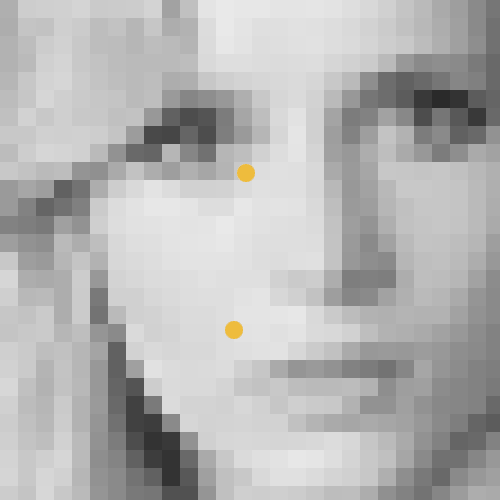

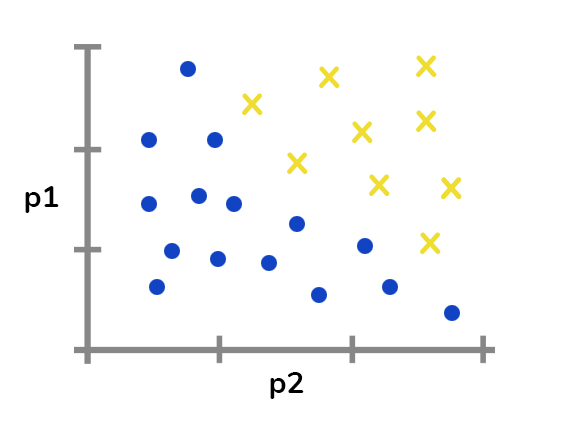

<code>**What is the dimension of the feature space ?**</code>. Suppose we were to use just <code>**50x50**</code> pixel small images. So we would have 2500 pixels, so our <code>**n = 2500**</code>, if in RGB color space then <code>**n = 7500**</code>.
Our feature vector x is a list of all of the pixels brightness values between 0 - 255. <br>

So if we were to learn a nonlinear hypothesis by including all the quadratic features that is all the terms of the form   <code>**(𝑥𝑖 * 𝑥𝑗) ≈ 3 mln features**</code>. And thats just too large to be reasonabe. The computation would be very expensive to find and to represent all of these <code>**3 million features per single training example**</code>. 

<div class="alert alert-block alert-success">

<h2>Practice exercise I</h2>

Suppose you are learning to recognize cars from 100\times100100×100 pixel images (grayscale, not RGB). Let the features be pixel intensity values. If you train logistic regression including all the quadratic terms <code>**(𝑥𝑖 * 𝑥𝑗)**</code> as features, about how many features will you have?
    
 * <code>**5000**</code>
 * <code>**100 000**</code>
 * <code>**5 million**</code>
 * <code>**5 billion**</code>
</div>

Simple logistic regression with adding in maybe the quadratic or the cubic features thats just not a good way to learn complex non linear hypothesis when n is large. Because we just end up with too many features. Thus <code>**Neural networks**</code> is much better way to learn complex non linear hypotheses even n is very large.

## Neural network model

They were developed as simulating networks of neurons in the brain.That the begining of artificial neuron called a <code>**Perceptron**</code>. Perceptrons were developed in the 1950's and 1960's by the scientist [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt), inspired by earlier work by [Warren McCulloch](https://en.wikipedia.org/wiki/Warren_Sturgis_McCulloch) and [Walter Pitts](https://en.wikipedia.org/wiki/Walter_Pitts)

In simplistic level a neuron is a computational unit that get a number of inputs through its input wires and does some computations and then it sends outputs via its axon to the other nodes or to other neurons in the brain. Neuron cells comunicate with small electical pulses, spikes.  


## Single sigmoid neuron (logistic activation function)

And artificial neural network model as just a logistic unit <code>**(single neuron)**</code>. 

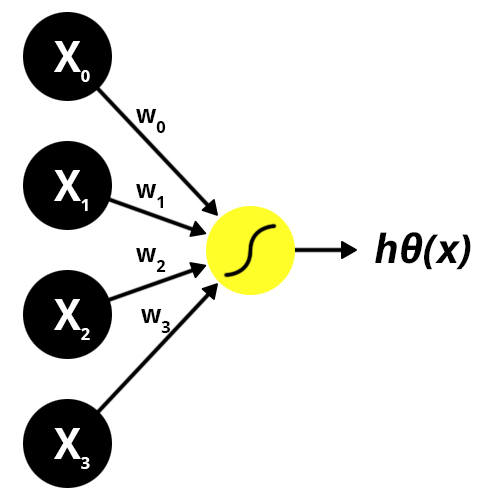

We need to feed the neuron a few inputs via its input wires and the neuron does some computation and outputs some value on output wire. This diagram mean the computation of:

\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

\begin{multline*}
x = 
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
x_3
\end{bmatrix},
\
\theta = 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\theta_{3}
\end{bmatrix}
\end{multline*}

Where as usual 𝑥 and 𝜃 are our parameter vectors. This is very simple and probably vastly oversimplified model of the computation that the neuron does. But in terms of artificial neural networks we call this a <code>**Sigmoid or logistic activation function**</code>. And 𝜃 parameters in neural newtorks terminalogy its sometimes called <code>**weights**</code> but it means the same thing the <code>**parameters of the model**</code>

## Neural network model

It is a group of different neuron (activation function) nodes hooked together. Therefore the core idea of NN is to solve complex non linear classification problem by using many sequences of simple logistic regression units that we call <code>**activation units.**</code>

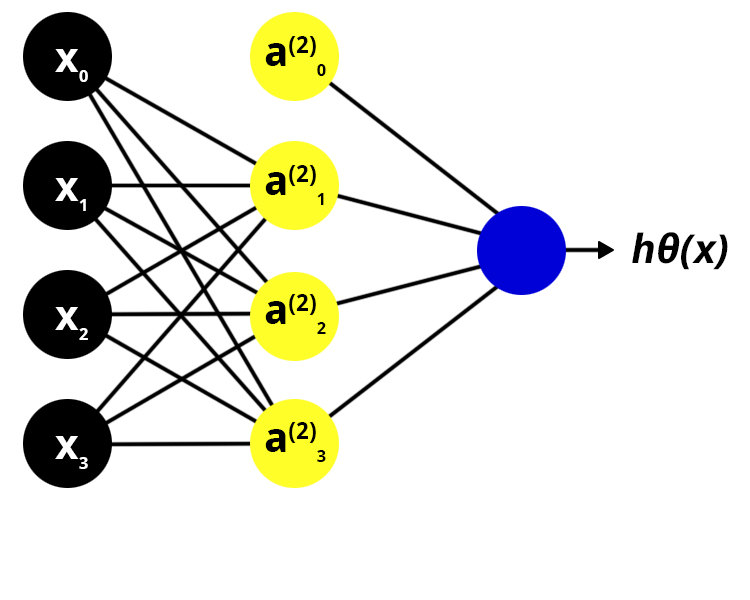

It has three layers: <code>**input, hidden, output**</code><br>
To explain the specific computations that are represented by this neural newtork diagram

\begin{multline*}
a_{i}^{ (j) } = \ \text{activation of unit} \ i \ \text{in layer} \ j
\end{multline*}

\begin{multline*}
\Theta^{ (j) } = \ \text{matrix of weights controlling function mapping from layer} \ j \ \text{to layer} \ j + 1
\end{multline*}

Our neural network is parametrized by these Θ matrixes of weights controlling the <code>**function mapping from one layer like from the first to the second layer**</code><br>
In order to get a clear picture about what this neural network is doing, let’s go through the computational steps and visualize them. First, we visualize the transition process of matrix Θ

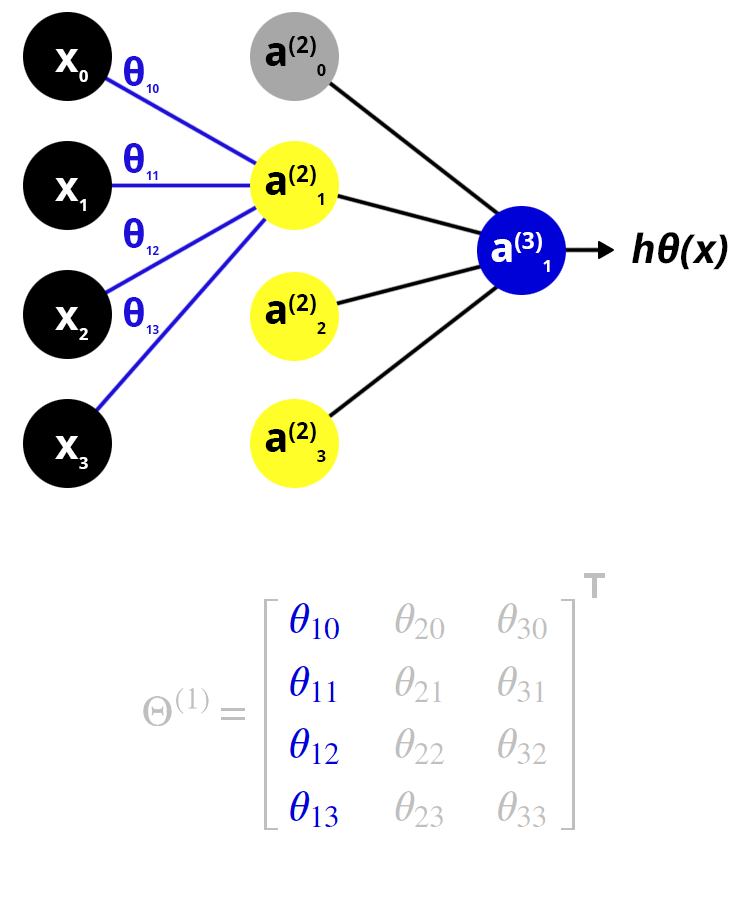

\begin{multline*}
\Theta^{\top}x = 
\begin{bmatrix}
\theta_{10} & \theta_{11} & \theta_{12} & \theta_{13} \\
\theta_{20} & \theta_{21} & \theta_{22} & \theta_{23} \\
\theta_{30} & \theta_{31} & \theta_{32} & \theta_{33} 
\end{bmatrix}
\
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\
x_{3}
\end{bmatrix}
\end{multline*}

Thi first hidden unit <code>**𝑎(2)1**</code> its value is computed as follows, the logistic activation function applied to linear combination of x inputs and parameters. And the same applied for the second <code>**a(2)2**</code> and third <code>**a(2)3**</code> units.

\begin{multline*}
a_{1}^{ (2) } = g( \Theta_{10}^{(1)}x_{0} + \Theta_{11}^{(1)}x_{1} + \Theta_{12}^{(1)}x_{2} +  \Theta_{13}^{(1)}x_{3} ) 
\end{multline*}

\begin{multline*}
a_{2}^{ (2) } = g( \Theta_{20}^{(1)}x_{0} + \Theta_{21}^{(1)}x_{1} + \Theta_{22}^{(1)}x_{2} +  \Theta_{23}^{(1)}x_{3} ) 
\end{multline*}

\begin{multline*}
a_{3}^{ (2) } = g( \Theta_{30}^{(1)}x_{0} + \Theta_{31}^{(1)}x_{1} + \Theta_{32}^{(1)}x_{2} +  \Theta_{33}^{(1)}x_{3} )
\end{multline*}

The dimension of Θ1 which is the matrix governing our mapping from our 1 layer to the 2 layer.
\begin{multline*}
\Theta^{(i)} \in \mathbb{R}^{3 \ \times 4}
\end{multline*}

\begin{multline*}
\text{if network has} \ s_{j} \ \text{units in layer} j, s_{j+1} \ \text{units in layer} j + 1, \ \text{, then} \ \Theta^{(j)}
\ \text{will be of dimmension} \ s_{j+1} \times (s_{j} + 1)
\end{multline*}

The +1 comes from the addition in of the "bias nodes". In other words the output nodes will not include the bias nodes while the inputs will
______________________________

<div class="alert alert-block alert-info">
\begin{multline*}
\text{Think of} \ \Theta_{ij}^{(l)} \ \text{as the arrow that connects the} \ j^{\sf{th}} \ 
\text{neuron in the} \ l^{\sf{th}} \text{layer with the} \ i^{\sf{th}} \ \text{neuron in the} \ (l+1)^{\sf{th}} \ \text{layer.} \ \text{The value (weight) tells you the strength of the connection. Column 0 contains the bias weights.} 
\end{multline*}

\begin{multline*}
\text{The weights are the arrows that} \ a_1^{(1)} \ \text{connects to} \ z_1^{(2)} \ \text{through} \ \Theta_{11}^{(1)} \ \text{and to} \ z_2^{(2)} \ \text{through} \ \Theta_{21}^{(1)}
\end{multline*}
    </div>

Second, we visualize each computation process of neurons. Note that the output value of <code>**each neurons is calculated by its logistic activation function.**</code>

By now we know what three <code>**hidden units**</code> do to compute their values. And finally the final output layer we have one more unt which computes ℎ𝜃(𝑥) and thats equal the logistic activation function applien to linear combination of Θ2 that is the matrix of parameters(weights) that control function that maps from the hidden units to the output unit.<br>

\begin{multline*}
h_{\Theta}(x) = a_{1}^{(3)} = g(\Theta_{10}^{(2)} a_{0}^{(2)} + \Theta_{11}^{(2)}a_{1}^{(2)} + \Theta_{12}^{(2)}a_{2}^{(2)} + \Theta_{13}^{(2)}a_{3}^{(2)})
\end{multline*}

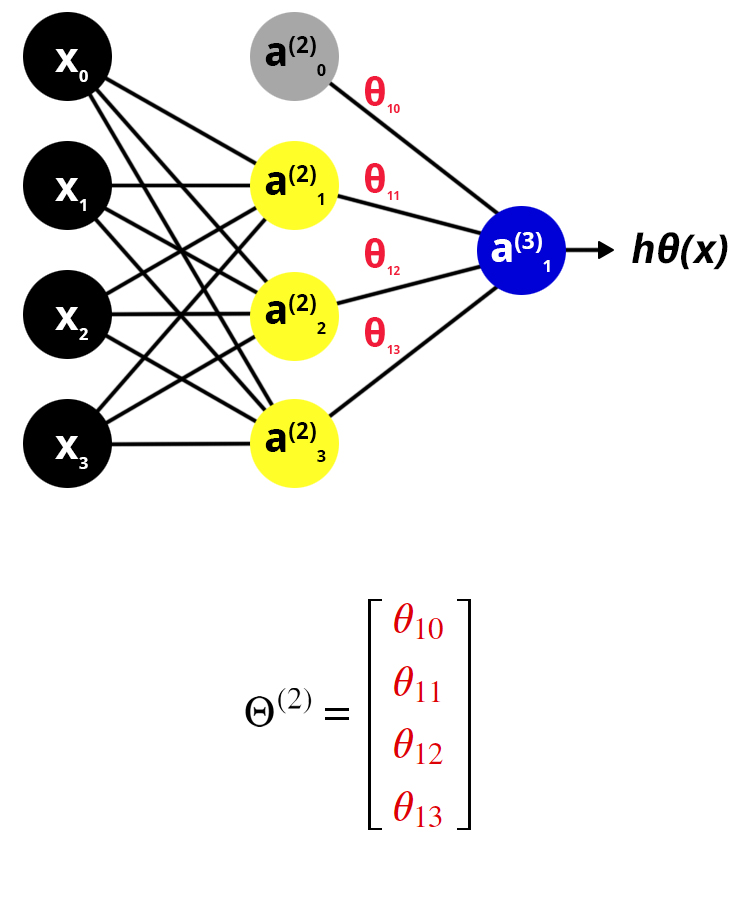

Thats how this diagram defines an <code>**artificial neural network, ANN**</code> which defines a function ℎ𝜃(𝑥) that maps with x's input values to some predictions of y, and these hypothesis are parametrized by Θ.